In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
#Gender, Married, Education, Self-employed, Loan Status needs to be labal enecoded.
train_data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
train_data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [6]:
le = LabelEncoder()
train_data['Education'] = le.fit_transform(train_data['Education'])



In [7]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
count = 0
for i in range(len(train_data['Gender'])):
    if pd.isnull(train_data['Gender'][i]) == True:
        count += 1
        if count<12:
            train_data['Gender'][i] = 'Male'
        else:
            train_data['Gender'][i] = 'Female'
    else:
        continue

C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
train_data['Gender'] = le.fit_transform(train_data['Gender'])

In [11]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
train_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
count = 0
for i in range(len(train_data['Married'])):
    if pd.isnull(train_data['Married'][i]) == True:
        count += 1
        if count<3:
            train_data['Married'][i] = 'Yes'
        else:
            train_data['Married'][i] = 'No'
    else:
        continue

C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
train_data['Married'] = le.fit_transform(train_data['Married'])

In [15]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
count = 0
for i in range(len(train_data['Self_Employed'])):
    if pd.isnull(train_data['Self_Employed'][i]) == True:
        count += 1
        if count<28:
            train_data['Self_Employed'][i] = 'No'
        else:
            train_data['Self_Employed'][i] = 'Yes'
    else:
        continue

C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
train_data['Self_Employed'] = le.fit_transform(train_data['Self_Employed'])

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           599 non-null object
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int32(4), int64(1), object(4)
memory usage: 52.8+ KB


In [20]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['Property_Area'], drop_first= True)],axis=1)

In [21]:
train_data.drop(['Property_Area'],axis =1).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,Y,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,N,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Y,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Y,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Y,0,1


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           599 non-null object
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Semiurban            614 non-null uint8
Urban                614 non-null uint8
dtypes: float64(4), int32(4), int64(1), object(4), uint8(2)
memory usage: 54.0+ KB


In [23]:
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [24]:
count = 0
for i in range(len(train_data['Credit_History'])):
    if pd.isnull(train_data['Credit_History'][i]) == True:
        count += 1
        if count<43:
            train_data['Credit_History'][i] = 1.0
        else:
            train_data['Credit_History'][i] = 0.0
    else:
        continue

C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1


In [26]:
train_data['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [27]:
train_data['Loan_Amount_Term'].fillna(360,inplace=True)

In [28]:
train_data['Loan_Status'] = le.fit_transform(train_data['Loan_Status'])

In [29]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,Urban,1,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,1


In [30]:
train_data.drop(["Property_Area"], axis = 1, inplace = True) 

In [31]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,1,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1


In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           599 non-null object
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Loan_Status          614 non-null int32
Semiurban            614 non-null uint8
Urban                614 non-null uint8
dtypes: float64(4), int32(5), int64(1), object(2), uint8(2)
memory usage: 46.8+ KB


In [33]:
train_data['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [34]:
train_data['LoanAmount'].fillna(146, inplace=True)

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           599 non-null object
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Loan_Status          614 non-null int32
Semiurban            614 non-null uint8
Urban                614 non-null uint8
dtypes: float64(4), int32(5), int64(1), object(2), uint8(2)
memory usage: 46.8+ KB


In [36]:
train_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [37]:
count = 0
for i in range(len(train_data['Dependents'])):
    if pd.isnull(train_data['Dependents'][i]) == True:
        count += 1
        if count<10:
            train_data['Dependents'][i] = 0
        elif 9<count<12:
            train_data['Dependents'][i] = 1
        elif 11<count<14:
            train_data['Dependents'][i] = 2
        elif 13<count<16:
            train_data['Dependents'][i] = '3+'
    else:
        continue
       

C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path 

In [38]:
train_data['Dependents'].replace('3+',3,inplace= True)

In [39]:
train_data['Dependents'] = train_data['Dependents'].astype('int64')

In [40]:
train_data['Dependents'] = le.fit_transform(train_data['Dependents'])

In [41]:
train_data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,LP001002,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,1,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,1,0,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,1,0,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,0,1,0


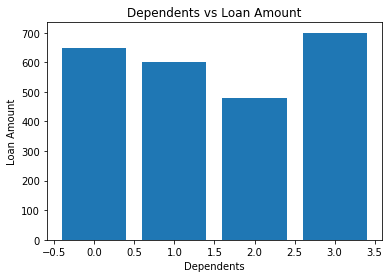

In [42]:
plt.title('Dependents vs Loan Amount')
plt.xlabel('Dependents')
plt.ylabel('Loan Amount')
plt.bar(train_data['Dependents'],train_data['LoanAmount'])
plt.show()

<i>Interesting trend. The loan amount decreased as the number of dependeents increased till it reached to 2. But as the number of dependents increased beyond 2, i.e. more than3, the loan amount also soared.</i>

(array([354.,   0.,   0., 104.,   0.,   0., 103.,   0.,   0.,  53.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

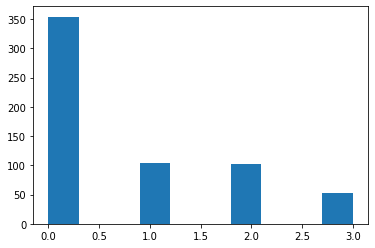

In [43]:
plt.hist(train_data['Dependents'])

<i>Most of the loan applicants were not having any dependants.</i>

In [44]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Semiurban',
       'Urban'],
      dtype='object')

In [45]:
X = train_data[[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History','Semiurban',
       'Urban']]

In [46]:
y = train_data[['Loan_Status']]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [48]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(460, 12) (460, 1)
(154, 12) (154, 1)


In [49]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0)
model = logReg.fit(X_train,y_train)

C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
prediction = logReg.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8506493506493507

In [52]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(model, X, y, cv=6)
print('Cross validated scores:', scores)

Cross validated scores: [0.82524272 0.76699029 0.7745098  0.81372549 0.82352941 0.82352941]


C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

In [53]:
test_data = pd.read_csv('test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [54]:
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [55]:
le = LabelEncoder()
test_data['Education'] = le.fit_transform(test_data['Education'])

In [56]:
test_data['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [57]:
count = 0
for i in range(len(test_data['Gender'])):
    if pd.isnull(test_data['Gender'][i]) == True:
        count += 1
        if count<9:
            test_data['Gender'][i] = 'Male'
        else:
            test_data['Gender'][i] = 'Female'
    else:
        continue

C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
test_data['Gender'] = le.fit_transform(test_data['Gender'])

In [59]:
test_data['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [62]:
count = 0
for i in range(len(test_data['Dependents'])):
    if pd.isnull(test_data['Dependents'][i]) == True:
        count += 1
        if count<7:
            test_data['Dependents'][i] = 0
        elif 6<count<9:
            test_data['Dependents'][i] = 2
        elif 18<count<10:
            test_data['Dependents'][i] = 1
        elif 9<count<11:
            test_data['Dependents'][i] = '3+'
    else:
        continue
       

C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
test_data['Dependents'].replace('3+',3,inplace= True)
test_data['Dependents'] = test_data['Dependents'].astype('int64')
test_data['Dependents'] = le.fit_transform(test_data['Dependents'])

In [66]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,Yes,0,0,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,Yes,1,0,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,Yes,2,0,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,Yes,2,0,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,1,No,0,1,No,3276,0,78.0,360.0,1.0,Urban


In [67]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null int32
Married              367 non-null object
Dependents           367 non-null int64
Education            367 non-null int32
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int32(2), int64(3), object(4)
memory usage: 31.6+ KB


In [68]:
test_data['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [69]:
count = 0
for i in range(len(test_data['Self_Employed'])):
    if pd.isnull(test_data['Self_Employed'][i]) == True:
        count += 1
        if count<21:
            test_data['Self_Employed'][i] = 'No'
        else:
            test_data['Self_Employed'][i] = 'Yes'
    else:
        continue

C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
test_data['Self_Employed'] = le.fit_transform(test_data['Self_Employed'])

In [71]:
test_data['LoanAmount'].describe()

count    362.000000
mean     136.132597
std       61.366652
min       28.000000
25%      100.250000
50%      125.000000
75%      158.000000
max      550.000000
Name: LoanAmount, dtype: float64

In [72]:
test_data['LoanAmount'].fillna(136, inplace=True)

In [74]:
test_data['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [75]:
test_data['Loan_Amount_Term'].describe()

count    361.000000
mean     342.537396
std       65.156643
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [76]:
test_data['Loan_Amount_Term'].fillna(360,inplace=True)

In [78]:
test_data['Married'] = le.fit_transform(test_data['Married'])

In [81]:
test_data = pd.concat([test_data,pd.get_dummies(test_data['Property_Area'], drop_first= True)],axis=1)

In [82]:
test_data.drop(["Property_Area"], axis = 1, inplace = True) 

In [83]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,0,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,0,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,0,1
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,NaN,0,1
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,0,1


In [84]:
test_data['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [85]:
count = 0
for i in range(len(test_data['Credit_History'])):
    if pd.isnull(test_data['Credit_History'][i]) == True:
        count += 1
        if count<25:
            test_data['Credit_History'][i] = 1.0
        else:
            test_data['Credit_History'][i] = 0.0
    else:
        continue

C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ankit.bo.kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              367 non-null object
Gender               367 non-null int32
Married              367 non-null int32
Dependents           367 non-null int64
Education            367 non-null int32
Self_Employed        367 non-null int32
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Semiurban            367 non-null uint8
Urban                367 non-null uint8
dtypes: float64(3), int32(4), int64(3), object(1), uint8(2)
memory usage: 26.6+ KB


In [87]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,0,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,0,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,0,1
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,0,1
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,0,1


In [89]:
test_X = test_data[[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History','Semiurban',
       'Urban']]
test_prediction = logReg.predict(test_X)

In [92]:
np.savetxt("loanPrediction.csv", test_prediction, delimiter=",")